In [284]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [344]:
gc_df = pd.read_csv('german_credit.csv')
gc_df.shape

(1000, 21)

In [345]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [346]:
X = gc_df.drop(labels= "default" , axis = 1)
Y = gc_df['default']
from sklearn.model_selection import train_test_split
X_trainOrg,X_testOrg,Y_trainOrg,Y_testOrg = train_test_split(X,Y, test_size=0.50, random_state=98098979)

In [347]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [348]:
# Print Shape of model data
print('Shape of the model data : {0}'.format(X_trainOrg.shape))
pd.get_dummies(X_trainOrg)

Shape of the model data : (500, 20)


,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
462,12,3017,3,1,34,1,1,1,0,0,...,0,1,1,0,0,0,1,0,0,1
570,24,3234,4,4,23,1,1,0,1,0,...,0,1,0,0,0,1,0,1,0,1
231,9,2507,2,4,51,1,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
253,24,4151,2,3,35,2,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
816,6,1338,1,4,62,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
964,6,454,3,1,22,1,1,1,0,0,...,1,0,0,0,0,1,1,0,0,1
344,10,3949,1,1,37,1,2,0,0,1,...,1,0,0,0,0,1,1,0,0,1
719,20,6148,3,4,31,2,1,1,0,0,...,1,0,0,1,0,0,0,1,0,1
260,12,1657,2,2,27,1,1,0,1,0,...,1,0,0,1,0,0,1,0,0,1
831,18,1216,4,3,23,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1


### Check for highly correlated variables but don't required any treatment for this use case

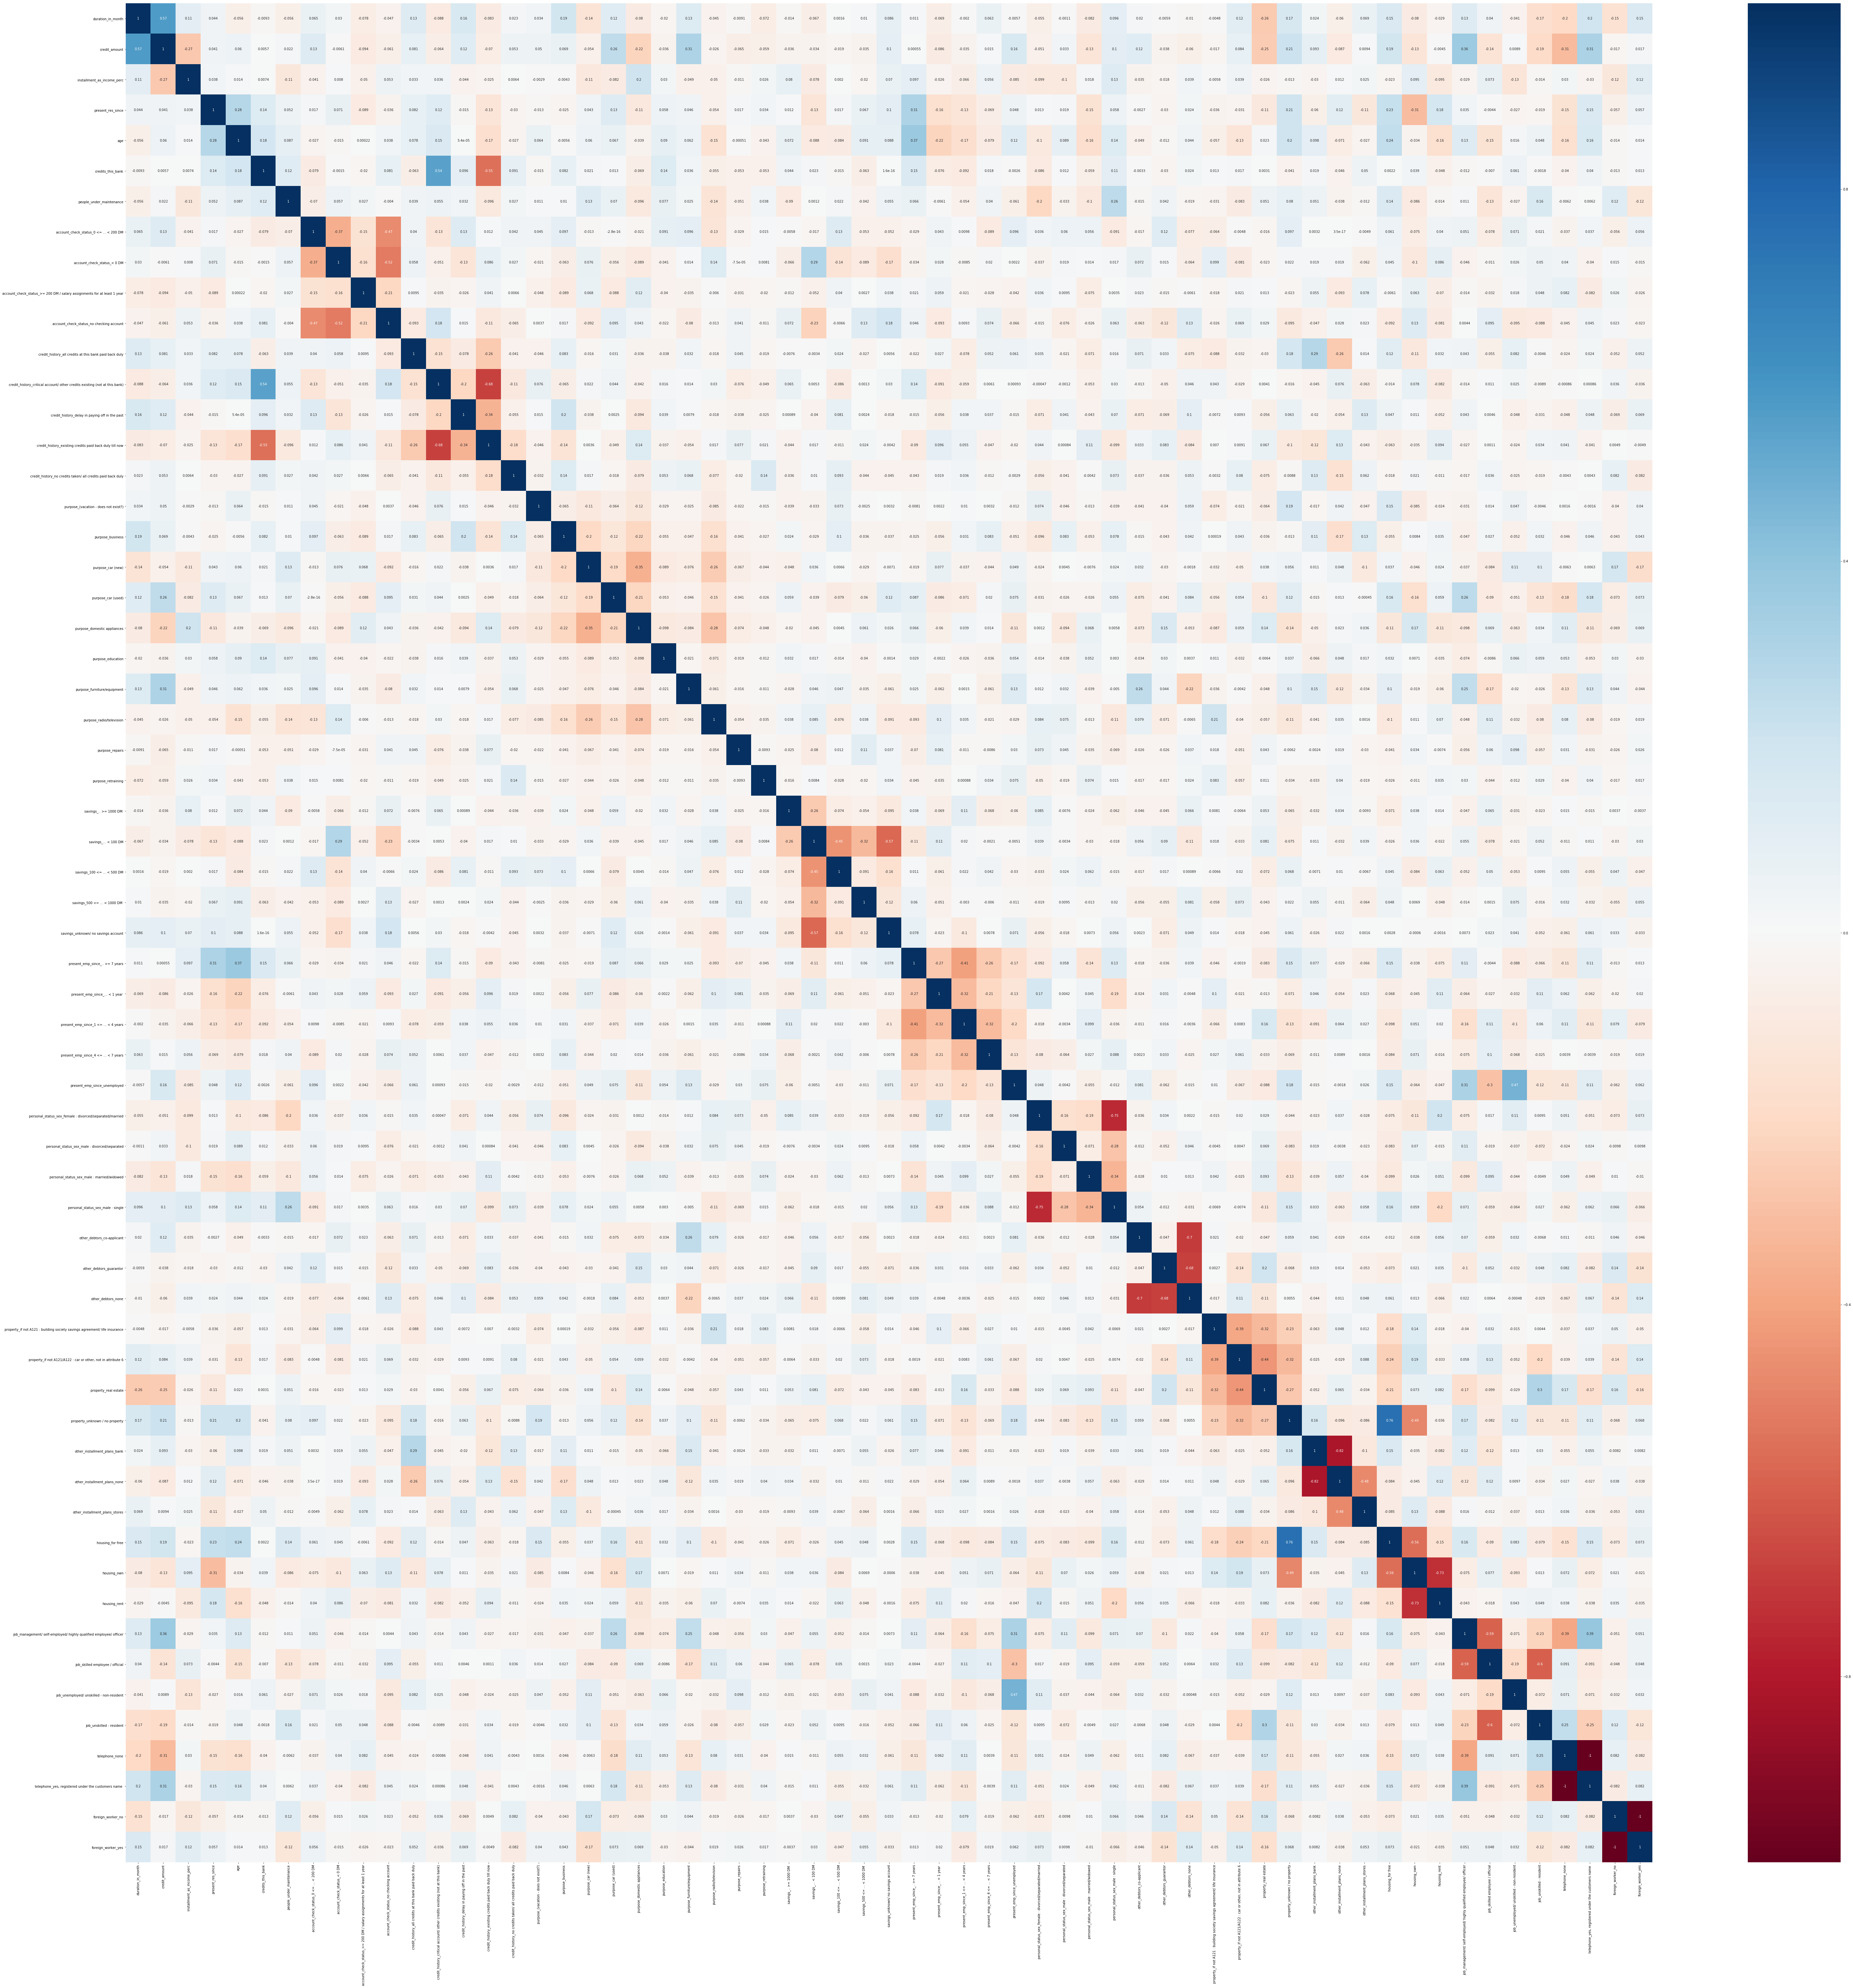

In [152]:
plt.figure(figsize=(105,105))
import seaborn as sn
sn.heatmap(pd.get_dummies(X_train).corr(), vmin=-1, vmax=1, cmap="RdBu",annot=True)

There is a above 50% correlation between creditAmount and duration, otherwise there is no +ve correlation. We can see -ve correlation in the dummy variables. 

### Drop the original variables which are converted to dummy

In [349]:
# the dropping not required as getdummies gives all the numeric data from the data frame. 
#I just dropped for the question sake. otherwise, we can use getdummies itself.

for i in gc_df.columns:
    if gc_df.dtypes[i] == 'object':
        gc_df.drop(i, axis=1, inplace=True)

In [350]:
gc_df.sample(2)

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
639,1,42,4370,3,2,26,2,2
387,0,18,7374,4,4,40,2,1


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [352]:
# As mentioned in the Q1, for this use case 50% of original data is picked up for the split.
X_trainOrg = pd.get_dummies(X_trainOrg)
from sklearn.model_selection import train_test_split
X = np.array(X_trainOrg)
Y = Y_trainOrg
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30, random_state=9878909)
print('Shape of train set data {0}'.format(X_trainset.shape))
print('Shape of train set data {0}'.format(X_test.shape))

Shape of train set data (350, 61)
Shape of train set data (150, 61)


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [353]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import zscore
rf_model = RandomForestClassifier(n_jobs=2, n_estimators=500, criterion='entropy', random_state=9999)

X_train_scaled = zscore(X_train) 
X_test_scaled = zscore(X_test)

rf_model.fit(X_train_scaled, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [354]:
from sklearn import metrics
rf_model_y_predict = rf_model.predict(X_test_scaled)
rf_model_trainsetscore = rf_model.score(X_train_scaled, Y_train)
rf_model_testsetscore = rf_model.score(X_test_scaled, Y_test)
print('Accuracy on train data set id {0}'.format(rf_model_trainsetscore))
print('Accuracy on test data set id {0}'.format(rf_model_testsetscore))

print(metrics.confusion_matrix(Y_test, rf_model_y_predict))
print('Accuracy on test data set id {0}'.format(metrics.accuracy_score(Y_test,rf_model_y_predict)))

Accuracy on train data set id 1.0
Accuracy on test data set id 0.7866666666666666
[[104   8]
 [ 24  14]]
Accuracy on test data set id 0.7866666666666666


### Q6 Show the list of the features importance( 1 Marks)

In [355]:
pd.DataFrame(rf_model.feature_importances_, index=X_trainOrg.columns, columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

,Feature Importance
credit_amount,0.106266
age,0.086044
duration_in_month,0.076940
account_check_status_no checking account,0.042695
present_res_since,0.036376
installment_as_income_perc,0.033698
account_check_status_< 0 DM,0.023496
purpose_car (new),0.022378
savings_... < 100 DM,0.021672
credits_this_bank,0.021557


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [356]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

In [357]:
# Use below values
num_folds = 10
seed = 77

In [358]:
#Validate the Random Forest model build above using k fold
kf = KFold(n_splits=num_folds, random_state=seed)


In [387]:
scores = cross_val_score(rf_model, zscore(X_trainOrg), Y_trainOrg, cv=kf)
print('Cross-validated scores:', scores)

Cross-validated scores: [0.78 0.74 0.76 0.72 0.72 0.78 0.68 0.68 0.82 0.76]


In [388]:
#Calculate Mean score

In [389]:
scores.mean()

0.744

In [390]:
# Calculate score standard deviation using std()

In [391]:
scores.std()

0.04270831300812523

# Q8 Print the confusion matrix( 1 Marks)

In [392]:
predicted= cross_val_predict(rf_model, zscore(pd.get_dummies(X_testOrg)), Y_testOrg, cv=kf)
metrics.confusion_matrix(Y_testOrg, predicted)

array([[318,  28],
       [ 92,  62]])

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [394]:
print(metrics.classification_report(Y_testOrg, predicted))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       346
           1       0.69      0.40      0.51       154

   micro avg       0.76      0.76      0.76       500
   macro avg       0.73      0.66      0.67       500
weighted avg       0.75      0.76      0.74       500



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [395]:
def plot_roc(fpr, tpr):
    plt.plot(fpr,tpr,label="roc", color='darkorange')
    plt.legend(loc=4)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.05, 1])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

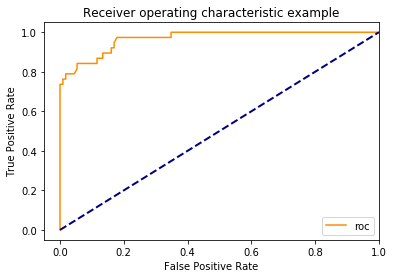

In [397]:
# There is a confusion in choosing the model splits that we have done. Here I have taken 70:30.
y_probs = rf_model.predict_proba(X_test_scaled)
probs=y_probs[:,1]
fpr, tpr, threshold = roc_curve(Y_test, probs)
plot_roc(fpr,tpr)


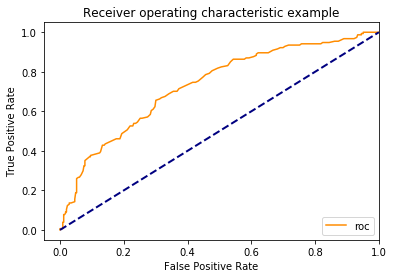

In [384]:
# There is a confusion here to choose the model splits that we have done. Here I have taken 50:50.
y_probs = rf_model.predict_proba(zscore(pd.get_dummies(X_testOrg)))
probs=y_probs[:,1]
fpr, tpr, threshold = roc_curve(Y_testOrg, probs)
plot_roc(fpr,tpr)


# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [378]:
y_probs = rf_model.predict_proba(X_test_scaled)
probs=y_probs[:,1]
auc = metrics.roc_auc_score(Y_test, probs)
print(auc)

0.8036889097744361


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [229]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [402]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
accuracy1 = []
for i in range(bootstrap_iteration):
    X_, y_ = resample(zscore(X_trainOrg), Y_trainOrg)
    rf_model.fit(X_, y_)
    y_pred = rf_model.predict(zscore(pd.get_dummies(X_testOrg)))
    
    acc = accuracy_score(y_pred, Y_testOrg)
    accuracy1.append(acc)

In [403]:
accuracy = np.array(accuracy1)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7404
Standard deviation:  0.009830564581955614
